# Goal: 

Predict how fast an item can sell

likely modeled as a regression problem for time duration or classification 

if grouped into sales speed categories, e.g., fast, average, slow


# Step 1: Load Dataset

In [1]:
import pandas as pd
import zipfile

# Path to the ZIP file
zip_path = '../Datasets/data.zip'

# Create a dictionary to store DataFrames
dataframes = {}

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as z:
    # List all files in the ZIP
    file_list = z.namelist()
    
    # Filter only valid CSV files in the 'data/' directory
    valid_files = [f for f in file_list if f.startswith('data/') and f.endswith('.csv') and not f.startswith('__MACOSX')]

    # Iterate over filtered files
    for file_name in valid_files:
        print(f"Processing file: {file_name}")  # Log the file being processed
        with z.open(file_name) as f:  # Open the file within the ZIP
            try:
                # Attempt to read the CSV file
                df = pd.read_csv(f, encoding='utf-8')
                # Only store non-empty DataFrames
                if not df.empty:
                    stripped_name = file_name.split('/')[-1]  # Get file name without the folder path
                    dataframes[stripped_name] = df
                    # Log the number of rows
                    print(f"Rows in {file_name}: {len(df)}")
                else:
                    print(f"Skipped empty file: {file_name}")
            except pd.errors.EmptyDataError:
                # Skip files that are empty
                print(f"Skipped empty file: {file_name}")
            except Exception as e:
                # Handle other unexpected errors
                print(f"Error reading {file_name}: {e}")


Processing file: data/171243_EBAY-US.csv
Rows in data/171243_EBAY-US.csv: 10000
Processing file: data/1281_EBAY-US.csv
Rows in data/1281_EBAY-US.csv: 69
Processing file: data/1_EBAY-US.csv
Rows in data/1_EBAY-US.csv: 59
Processing file: data/293_EBAY-US.csv
Rows in data/293_EBAY-US.csv: 4794
Processing file: data/117419_EBAY-US.csv
Rows in data/117419_EBAY-US.csv: 9999
Processing file: data/184488_EBAY-US.csv
Rows in data/184488_EBAY-US.csv: 1760
Processing file: data/20628_EBAY-US.csv
Rows in data/20628_EBAY-US.csv: 5644
Processing file: data/26395_EBAY-US.csv
Rows in data/26395_EBAY-US.csv: 21
Processing file: data/550_EBAY-US.csv
Rows in data/550_EBAY-US.csv: 124
Processing file: data/117422_EBAY-US.csv
Rows in data/117422_EBAY-US.csv: 2032
Processing file: data/117421_EBAY-US.csv
Rows in data/117421_EBAY-US.csv: 2699
Processing file: data/170098_EBAY-US.csv
Rows in data/170098_EBAY-US.csv: 10000
Processing file: data/11233_EBAY-US.csv
Rows in data/11233_EBAY-US.csv: 250
Processing 

In [2]:
# Display the loaded DataFrames
print(f"Loaded {len(dataframes)} DataFrames.")
for name, df in dataframes.items():
    print(f"DataFrame from {name}:")
    print(df.head())  # Print the first few rows of each DataFrame
    print()

Loaded 35 DataFrames.
DataFrame from 171243_EBAY-US.csv:
                                               Title       Item ID  Price  \
0  Chicken Soup for the Soul: Christmas Magic: 10...  116382827420   3.99   
1  CreativeHavenHome forthe Holidays Coloring Boo...  286082795097   6.88   
2  The Dead of Winter: Beware the Krampus and Oth...  305886555883   6.64   
3  Christmas with Martha Stewart Living Classic C...  267000460794   4.89   
4  Lot Of 10 Christmas Picture Books,  Look And F...  405331880741  18.00   

  Currency  Condition Category           Seller  Feedback Score  \
0      USD  Brand New    Books     45maxellen68            1520   
1      USD  Brand New    Books  jmratkowski95sh            1225   
2      USD   Like New    Books     bmrfq03kde46               4   
3      USD  Very Good    Books      second.sale         3660470   
4      USD       Good    Books     paisleycrazy            5302   

   Positive Feedback %  Top Rated Seller  ... Buy It Now Available  \
0      

### Validate the dataframes

In [3]:
# Get the reference columns (using the first DataFrame in the dictionary)
reference_columns = list(next(iter(dataframes.values())).columns)
print("Reference Columns:", reference_columns)

# Filter DataFrames with matching columns
aligned_dataframes = {
    name: df for name, df in dataframes.items() if list(df.columns) == reference_columns
}

# List DataFrames that are misaligned
misaligned_files = [
    name for name, df in dataframes.items() if list(df.columns) != reference_columns
]

print(f"Aligned DataFrames: {len(aligned_dataframes)}")
print(f"Misaligned DataFrames: {len(misaligned_files)}")
print("Misaligned Files:", misaligned_files)

# Combine aligned DataFrames
combined_df = pd.concat(aligned_dataframes.values(), ignore_index=True)

# Display the combined DataFrame
print(f"Combined DataFrame shape: {combined_df.shape}")
print(combined_df.head())

Reference Columns: ['Title', 'Item ID', 'Price', 'Currency', 'Condition', 'Category', 'Seller', 'Feedback Score', 'Positive Feedback %', 'Top Rated Seller', 'Shipping Type', 'Shipping Cost', 'Listing Type', 'Buy It Now Available', 'Start Time', 'End Time', 'Store Name', 'Store URL', 'Gallery URL', 'Large Image URL', 'Super Size Image URL', 'View Item URL', 'Marketplace']
Aligned DataFrames: 35
Misaligned DataFrames: 0
Misaligned Files: []
Combined DataFrame shape: (96989, 23)
                                               Title       Item ID  Price  \
0  Chicken Soup for the Soul: Christmas Magic: 10...  116382827420   3.99   
1  CreativeHavenHome forthe Holidays Coloring Boo...  286082795097   6.88   
2  The Dead of Winter: Beware the Krampus and Oth...  305886555883   6.64   
3  Christmas with Martha Stewart Living Classic C...  267000460794   4.89   
4  Lot Of 10 Christmas Picture Books,  Look And F...  405331880741  18.00   

  Currency  Condition Category           Seller  Feedbac

**Findings** 

No misalignment between 35 dataframes created from 35 different csv files. 

Proceeding with combining the dataframes.

### Combine the dataframes

In [4]:
# Combine all DataFrames into one
combined_df = pd.concat(dataframes.values(), ignore_index=True)

# Display the shape of the combined DataFrame
print(f"Combined DataFrame shape: {combined_df.shape}")

# Preview the combined DataFrame
print(combined_df.head())

Combined DataFrame shape: (96989, 23)
                                               Title       Item ID  Price  \
0  Chicken Soup for the Soul: Christmas Magic: 10...  116382827420   3.99   
1  CreativeHavenHome forthe Holidays Coloring Boo...  286082795097   6.88   
2  The Dead of Winter: Beware the Krampus and Oth...  305886555883   6.64   
3  Christmas with Martha Stewart Living Classic C...  267000460794   4.89   
4  Lot Of 10 Christmas Picture Books,  Look And F...  405331880741  18.00   

  Currency  Condition Category           Seller  Feedback Score  \
0      USD  Brand New    Books     45maxellen68            1520   
1      USD  Brand New    Books  jmratkowski95sh            1225   
2      USD   Like New    Books     bmrfq03kde46               4   
3      USD  Very Good    Books      second.sale         3660470   
4      USD       Good    Books     paisleycrazy            5302   

   Positive Feedback %  Top Rated Seller  ... Buy It Now Available  \
0                100.0    

**Findings**

Combined df has 96989 rows and 35 columns. 

Now going to do EDA on this df.

# Step 2: EDA

#### Initial Analysis

In [5]:
import numpy as np

In [6]:
# Make a copy of the combined_df
df = combined_df.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96989 entries, 0 to 96988
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 96989 non-null  object 
 1   Item ID               96989 non-null  int64  
 2   Price                 96989 non-null  float64
 3   Currency              96989 non-null  object 
 4   Condition             92951 non-null  object 
 5   Category              96989 non-null  object 
 6   Seller                96989 non-null  object 
 7   Feedback Score        96989 non-null  int64  
 8   Positive Feedback %   96989 non-null  float64
 9   Top Rated Seller      96989 non-null  bool   
 10  Shipping Type         96989 non-null  object 
 11  Shipping Cost         76466 non-null  float64
 12  Listing Type          96989 non-null  object 
 13  Buy It Now Available  96989 non-null  bool   
 14  Start Time            96989 non-null  object 
 15  End Time           

#### Calculate Target Variable -> Sales speed 

In [8]:
# Convert start time and end time to correct dtype

df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')
df['End Time'] = pd.to_datetime(df['End Time'], errors='coerce')

In [9]:
# Calculate duration in hours
df['Duration (hours)'] = (df['End Time'] - df['Start Time']).dt.total_seconds() / 3600

#### Drop Irrelevant column -> ID 

In [10]:
df = df.drop(columns=['Item ID'])

#### Verify datatypes of the columns

In [11]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Columns:")
for col in numeric_columns:
    print(col)

# Select object (categorical or string) columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
for col in categorical_columns:
    print(col)

# Select boolean columns
boolean_columns = df.select_dtypes(include=['bool']).columns
print("\nBoolean Columns:")
for col in boolean_columns:
    print(col)

# Select datetime columns
datetime_columns = df.select_dtypes(include=['datetime']).columns
print("\nDatetime Columns:")
for col in datetime_columns:
    print(col)

Numeric Columns:
Price
Feedback Score
Positive Feedback %
Shipping Cost
Duration (hours)

Categorical Columns:
Title
Currency
Condition
Category
Seller
Shipping Type
Listing Type
Store Name
Store URL
Gallery URL
Large Image URL
Super Size Image URL
View Item URL
Marketplace

Boolean Columns:
Top Rated Seller
Buy It Now Available

Datetime Columns:
Start Time
End Time


In [12]:
for col in categorical_columns:
    unique_values = combined_df[col].nunique()
    print(f"{col}: {unique_values} unique values")
    print(combined_df[col].value_counts().head())  # Show top 5 values
    print()

Title: 68659 unique values
Title
African Tribal Shirt Mens Dashiki Print Fashion Hippie Top Blouse Casual Shirts     400
2 Pack Spill Stopper Lid Cover, 10.2 inch and 11 inch, Boil Over ‎Spill Stopp...    396
Diecast Plane EDISON AIR LINE H.F. R.A.F. S.E. 5a, 1917,  WW 1 Fighter Plane        300
Nordic Ware Christmas Pancake Pan Griddle Skillet Santa Tree Snowman Gingerbread    202
Plastic B747 Toy Airplane with Pencil Sharpener Christmas Special Made in Japan     200
Name: count, dtype: int64

Currency: 5 unique values
Currency
USD    94047
AUD     1201
GBP     1025
CAD      696
EUR       20
Name: count, dtype: int64

Condition: 17 unique values
Condition
New          55174
Used         11920
Good          6252
Brand New     6067
Very Good     4557
Name: count, dtype: int64

Category: 755 unique values
Category
Books                           10097
Wreaths, Garlands & Plants       9979
Greeting Cards & Invitations     9897
Contemporary Manufacture         5936
Nativity Items          

In [13]:
df.isna().sum()

Title                       0
Price                       0
Currency                    0
Condition                4038
Category                    0
Seller                      0
Feedback Score              0
Positive Feedback %         0
Top Rated Seller            0
Shipping Type               0
Shipping Cost           20523
Listing Type                0
Buy It Now Available        0
Start Time                  0
End Time                    0
Store Name              15676
Store URL               15676
Gallery URL              1041
Large Image URL          2888
Super Size Image URL     2888
View Item URL               0
Marketplace                 0
Duration (hours)            0
dtype: int64

In [14]:
!pip install missingno

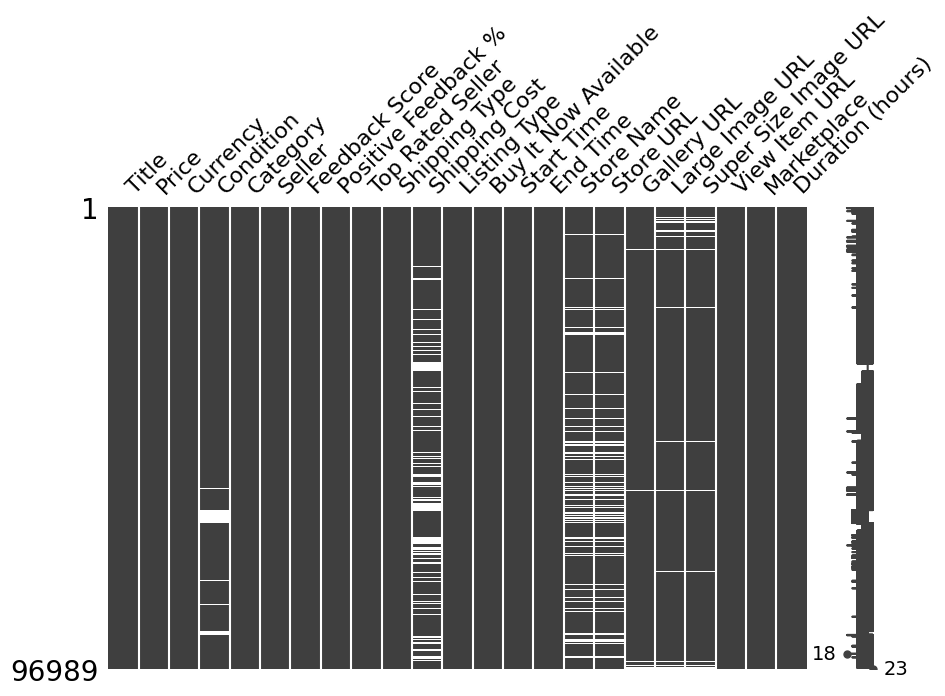

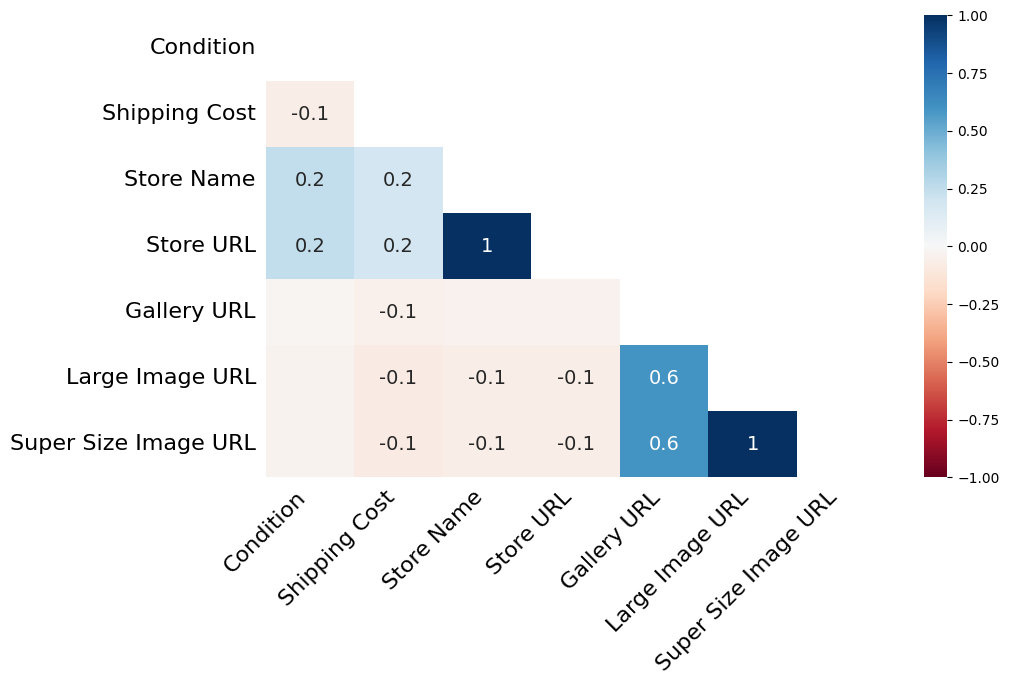

In [15]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize the missing data matrix
msno.matrix(df, figsize=(10, 6), sparkline=True)
plt.show()

# Missingness heatmap
msno.heatmap(df, figsize=(10, 6))
plt.show()

In [16]:
# Calculate total rows in the DataFrame
total_rows = len(df)

# Calculate percentage of missing values
missing_percentage = df.isnull().sum() / total_rows * 100

# Combine missing counts and percentages into a single DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Count': df.isna().sum(),
    'Missing Percentage': missing_percentage
})

# Sort by percentage (descending order) for easier interpretation
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

# Display the summary
print(missing_summary)

                      Missing Count  Missing Percentage
Shipping Cost                 20523           21.160132
Store Name                    15676           16.162658
Store URL                     15676           16.162658
Condition                      4038            4.163359
Large Image URL                2888            2.977657
Super Size Image URL           2888            2.977657
Gallery URL                    1041            1.073318


### Investigate Missingness

#### Missing data from Shipping Cost column

In [17]:
# Analyze Shipping Cost by Shipping Type
shipping_analysis = combined_df.groupby('Shipping Type')['Shipping Cost'].agg(['mean', 'median', 'count'])
print(shipping_analysis)

# Investigate rows with missing Shipping Cost
missing_shipping = combined_df[combined_df['Shipping Cost'].isnull()]
print("Rows with missing Shipping Cost by Shipping Type:")
print(missing_shipping['Shipping Type'].value_counts())


                                          mean  median  count
Shipping Type                                                
Calculated                                 NaN     NaN      0
CalculatedDomesticFlatInternational   0.000000    0.00     20
Flat                                  8.239184    5.90  20327
FlatDomesticCalculatedInternational   5.884258    4.50    721
Free                                  0.000000    0.00  52054
FreePickup                            0.000000    0.00   3341
Freight                                    NaN     NaN      0
NotSpecified                         16.023333    4.54      3
Rows with missing Shipping Cost by Shipping Type:
Shipping Type
Calculated                             20002
Flat                                     474
CalculatedDomesticFlatInternational       45
Freight                                    2
Name: count, dtype: int64


**Findings**

Observations from the Data

Shipping Types with Clear Patterns:

* Free: Mean and median are 0.00 (consistent with free shipping).
* FlatDomesticCalculatedInternational: Median is 4.50, and the count is significant (721).

Shipping Types with Missing Costs:

* Calculated: Majority of missing values are in this category (20,002 rows), and there’s no information in the summary to impute directly.
* Flat: Some missing values (474 rows), but median cost is 5.90, making it reasonable to impute with this value.

Small Categories:

* Freight and NotSpecified: Very few rows with missing costs; imputation may rely on default values like the overall median.

#### Missing data from Store Name, and URLs columns

In [18]:
# Add missingness flags for columns
df['Store Name Missing'] = df['Store Name'].isnull().astype(int)
df['Store URL Missing'] = df['Store URL'].isnull().astype(int)
df['Gallery URL Missing'] = df['Gallery URL'].isnull().astype(int)
df['Large Image URL Missing'] = df['Large Image URL'].isnull().astype(int)
df['Super Size Image URL Missing'] = df['Super Size Image URL'].isnull().astype(int)

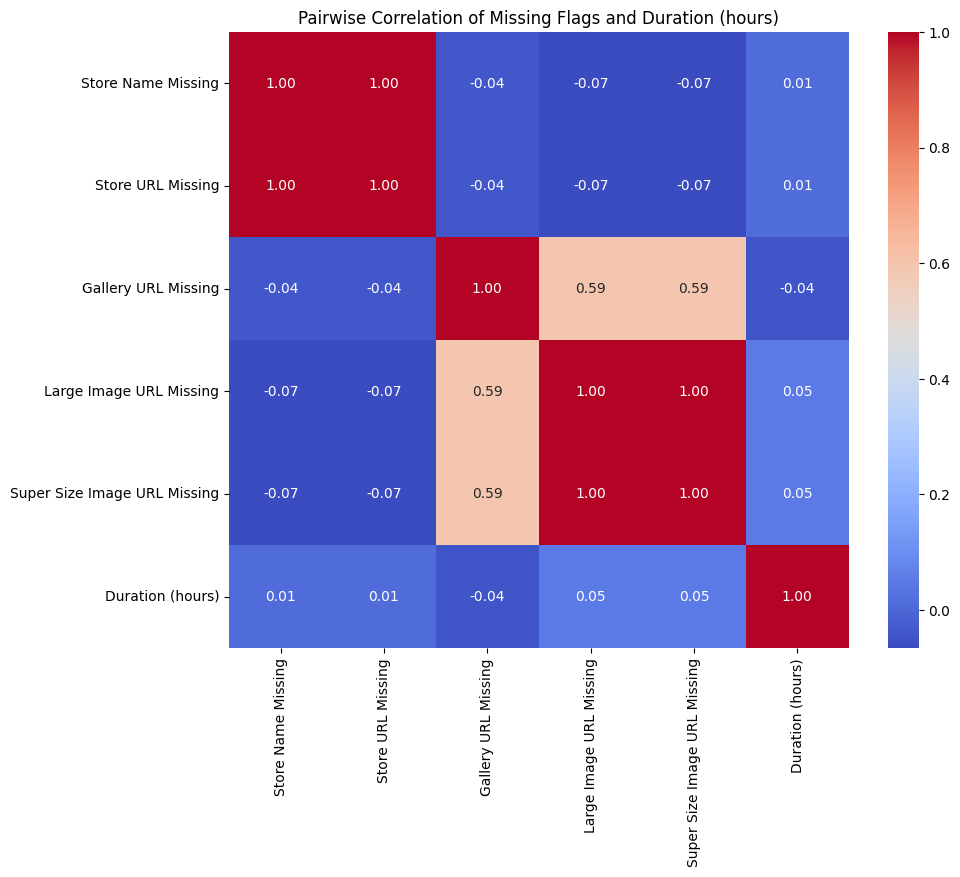

In [19]:
import seaborn as sns

# Calculate correlation
correlation_condition_missing = df[['Store Name Missing', 'Store URL Missing', 
                                    'Gallery URL Missing', 'Large Image URL Missing', 
                                    'Super Size Image URL Missing', 'Duration (hours)']].corr()

# Plot pairwise heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_condition_missing, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pairwise Correlation of Missing Flags and Duration (hours)")
plt.show()

**Findings**

All missing flags have very low correlations with the target (Duration (hours)), 

suggesting that missingness in these columns does not strongly influence the sales speed.


Merge Store Name and Store URL as they are perfectly correlated

In [20]:
# Merge Store Name Missing and Store URL Missing
df['Store Info Missing'] = df['Store Name Missing']

# Drop Store Name Missing and Store URL Missing columns
df = df.drop(columns=['Store Name Missing', 'Store URL Missing'])

In [21]:
# Correlation of Store Info Missing with the target
correlation_store_info = df[['Store Info Missing', 'Duration (hours)']].corr()
print(correlation_store_info)

                    Store Info Missing  Duration (hours)
Store Info Missing            1.000000          0.010672
Duration (hours)              0.010672          1.000000


In [22]:
print(df['Store Info Missing'].value_counts())

Store Info Missing
0    81313
1    15676
Name: count, dtype: int64


Do the same thing for Image URL cols

In [23]:
# Create a combined missingness flag for image-related URLs
df['Image Info Missing'] = df['Large Image URL Missing'] | df['Super Size Image URL Missing']

# Drop the original missingness flags
df = df.drop(columns=['Large Image URL Missing', 'Super Size Image URL Missing'])

In [24]:
# Correlation of URL columns with the target
correlation_store_info = df[['Image Info Missing', 'Duration (hours)']].corr()
print(correlation_store_info)

                    Image Info Missing  Duration (hours)
Image Info Missing             1.00000           0.05042
Duration (hours)               0.05042           1.00000


In [25]:
print(df['Image Info Missing'].value_counts())

Image Info Missing
0    94101
1     2888
Name: count, dtype: int64


#### Drop these columns

In [26]:
# Drop Store Name and Store URL
df = df.drop(columns=['Store Name', 'Store URL'])

In [27]:
df = df.drop(columns=['Gallery URL', 'Large Image URL', 'Super Size Image URL'])

#### Missing data from Condition column

In [28]:
# Check the number of missing values
print(df['Condition'].isnull().sum())

# Add a missingness flag
df['Condition Missing'] = df['Condition'].isnull().astype(int)

4038


In [29]:
# Correlation of the missing flag with the target
correlation_condition_missing = df[['Condition Missing', 'Duration (hours)']].corr()
print(correlation_condition_missing)

                   Condition Missing  Duration (hours)
Condition Missing           1.000000          0.026646
Duration (hours)            0.026646          1.000000


### Visualize Distributions of each numeric column

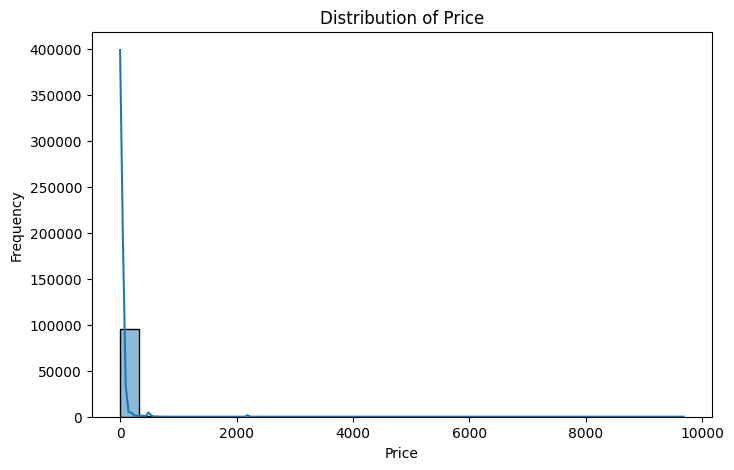

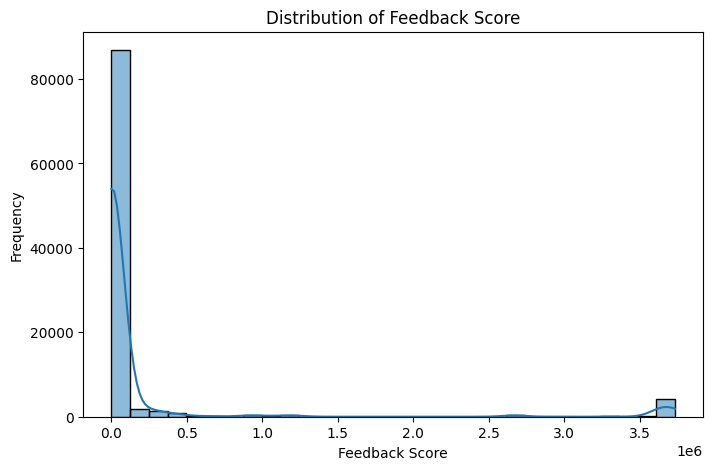

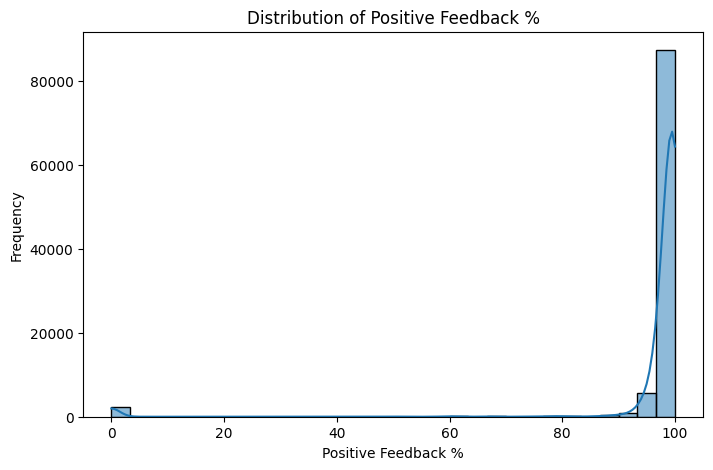

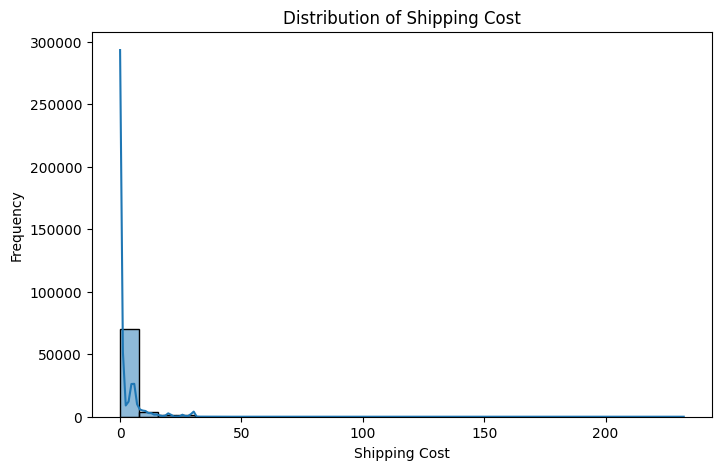

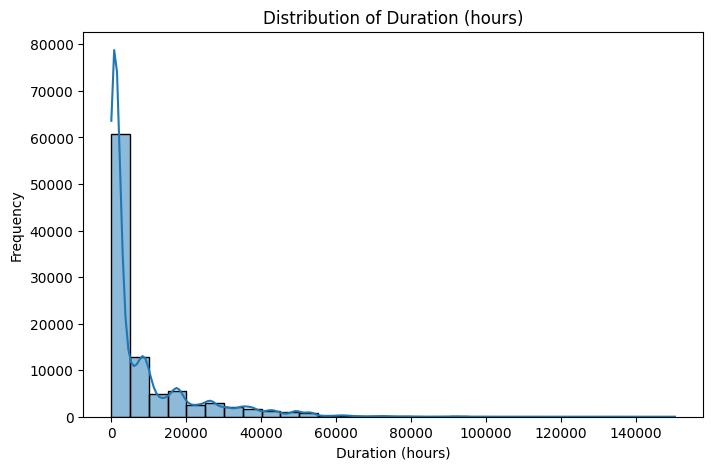

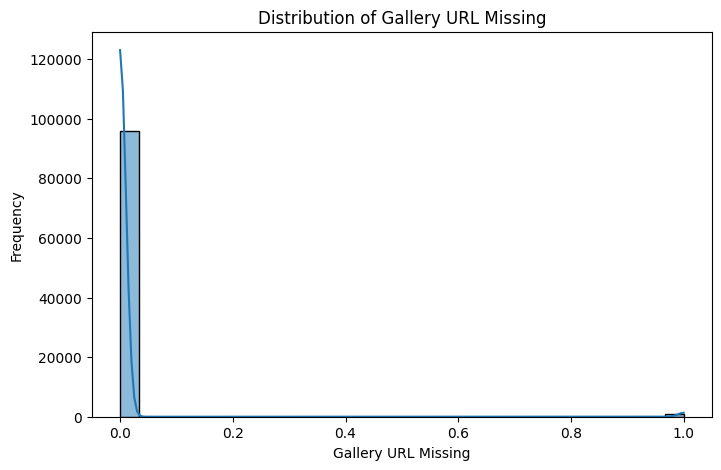

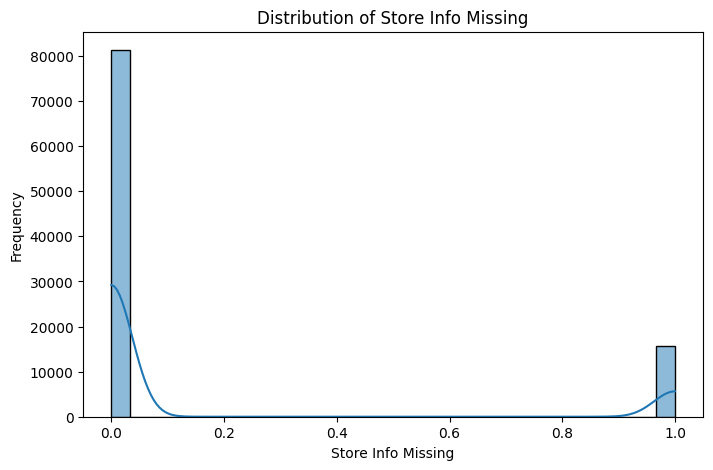

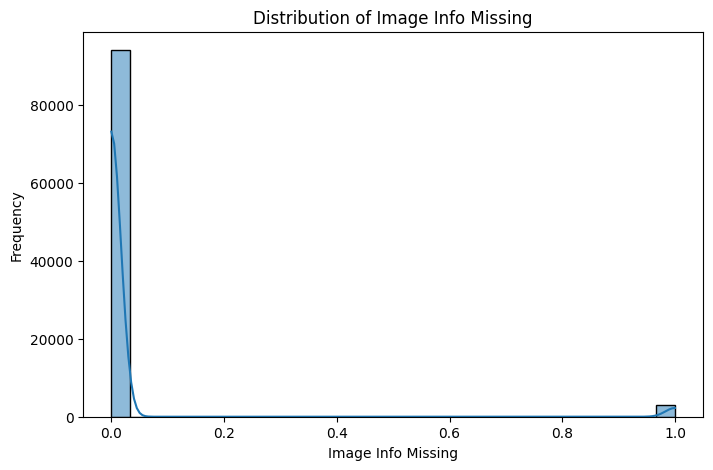

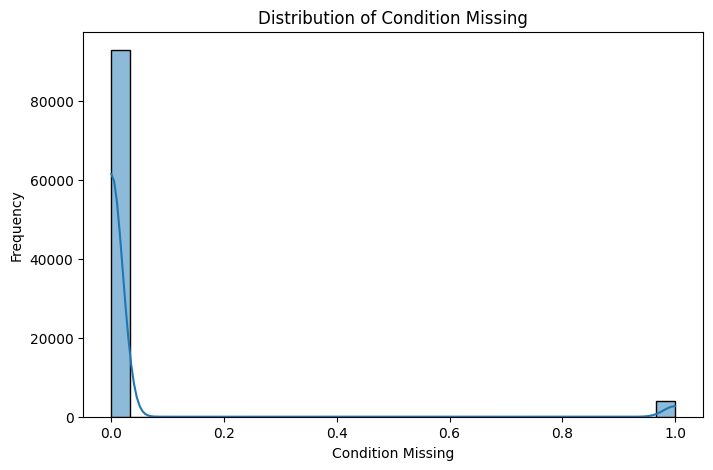

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# filter numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot distributions for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### Check Skewness of nuermic columns

In [31]:
# Calculate skewness for each numeric column
skewness = df[numeric_cols].skew()

# Display skewness
print("Skewness of Numeric Columns:")
print(skewness)

Skewness of Numeric Columns:
Price                  19.932290
Feedback Score          4.026940
Positive Feedback %    -6.115403
Shipping Cost           5.327665
Duration (hours)        2.707374
Gallery URL Missing     9.496458
Store Info Missing      1.838475
Image Info Missing      5.533090
Condition Missing       4.589462
dtype: float64


#### Navigating Positive Feedback column

In [32]:
print(df['Positive Feedback %'].describe())
print(df['Positive Feedback %'].value_counts().head())

count    96989.000000
mean        96.567655
std         15.049096
min          0.000000
25%         98.400000
50%         99.500000
75%        100.000000
max        100.000000
Name: Positive Feedback %, dtype: float64
Positive Feedback %
100.0    36088
98.4      4390
99.7      4286
99.6      3196
99.5      3194
Name: count, dtype: int64


**Findings**

Given the skewed nature of the Positve Feedback % column (many rows concentrated at 100%), Feedback Category is likely a better choice for Random Forest. 

It simplifies the feature and reduces the likelihood of the model being overwhelmed by the imbalance.

#### Navigating Shipping Cost column

In [33]:
print(df['Shipping Cost'].describe())
print(df['Shipping Cost'].value_counts().head())

count    76466.000000
mean         2.246338
std          5.595454
min          0.000000
25%          0.000000
50%          0.000000
75%          1.650000
max        232.210000
Name: Shipping Cost, dtype: float64
Shipping Cost
0.00     55706
5.99      1265
5.00      1000
5.95       920
30.00      910
Name: count, dtype: int64


**Findings**

Based on the summary statistics and distribution of Shipping Cost, 

it's clear that the data is highly skewed, with a majority of rows having a cost of 0.00 (likely indicating free shipping). 

Here's how we can handle this using two transformations: 

* a binary free shipping feature and 
* cost bins.

# Step 3: Data Preparation

### Target Column -> Sales Speed

#### Extract Features from Start Time and End Time

Datetime columns can be decomposed into features that might influence the target variable (e.g., how fast items sell). 

In [34]:
# Extract temporal features from Start Time
df['Start Day'] = df['Start Time'].dt.day_name()  # Day of the week
df['Start Hour'] = df['Start Time'].dt.hour      # Hour of the day
df['Start Month'] = df['Start Time'].dt.month    # Month

# Extract temporal features from End Time
df['End Day'] = df['End Time'].dt.day_name()
df['End Hour'] = df['End Time'].dt.hour

In [35]:
# Create a weekend indicator for Start and End Time
df['Start Weekend'] = df['Start Time'].dt.dayofweek >= 5  # Saturday & Sunday
df['End Weekend'] = df['End Time'].dt.dayofweek >= 5

In [36]:
# Encode Start Day and End Day
df_encoded = pd.get_dummies(df, columns=['Start Day', 'End Day'], drop_first=True)

# Define temporal features (now including encoded columns)
temporal_features = [
    'Start Hour', 'Start Month', 'Start Weekend', 'End Hour', 'End Weekend'
] + [col for col in df_encoded.columns if col.startswith('Start Day_') or col.startswith('End Day_')]

# Correlation with target
correlation_with_target = df_encoded[temporal_features].corrwith(df_encoded['Duration (hours)'])
print("Correlation with Target:")
print(correlation_with_target)

Correlation with Target:
Start Hour             0.031545
Start Month           -0.289674
Start Weekend          0.040362
End Hour               0.002679
End Weekend           -0.027285
Start Day_Monday      -0.002611
Start Day_Saturday     0.026098
Start Day_Sunday       0.026622
Start Day_Thursday     0.014019
Start Day_Tuesday     -0.006639
Start Day_Wednesday   -0.051437
End Day_Monday         0.049172
End Day_Saturday      -0.003227
End Day_Sunday        -0.031844
End Day_Thursday       0.011507
End Day_Tuesday       -0.000680
End Day_Wednesday     -0.019977
dtype: float64


BOOKMARK!

**Correlation Insights (Time Features)**

* Keep Start Month:

    With a correlation of -0.2897, this feature captures seasonality and has moderate predictive power.

* Keep Start Weekend and Start Day:

    Although weakly correlated, weekend-related features (Start Weekend, Start Day_Saturday, Start Day_Sunday) might add slight value.

* Drop Weak Features: (**To drop these weak features afterwards**)

    * End Features: End Hour, End Weekend, and most End Day categories have minimal correlation with the target. Consider dropping them.

    * Start Hour: Very weak correlation (0.0315), likely not meaningful unless supported by other analysis.


#### 4. Dropping the Raw Datetime Columns

In [37]:
# Drop raw datetime columns
df = df.drop(columns=['Start Time', 'End Time'])

### Transform Positive Feedback % Column

#### Step 1: Convert Feedback Percentage to Categories

Given the skewed nature of the data (many rows concentrated at 100%), Feedback Category is likely a better choice.

It simplifies the feature and reduces the likelihood of the model being overwhelmed by the imbalance.

Why Feedback Category for Random Forest

* Handles Skew Better: Simplifies the feature, reducing the impact of over-represented values like 100%.

* Improves Interpretability: Categorical splits like Feedback Category = Perfect are easier to understand.

* No Scaling Issues: Random Forest works well with categorical features and doesn’t require scaling.

In [38]:
# Create Feedback Category
bins = [0, 90, 95, 99, 100]  # Define ranges
labels = ['Low', 'Medium', 'High', 'Perfect']
if 'Feedback Category' not in combined_df.columns:
    df['Feedback Category'] = pd.cut(
        df['Positive Feedback %'],
        bins=bins,
        labels=labels,
        include_lowest=True
    )

#### Step 2: Encode the Categorical Feature

In [39]:
# 1. One-Hot Encoding

df_onehot = pd.get_dummies(df, columns=['Feedback Category'], drop_first=True)
onehot_features = [col for col in df_onehot.columns if col.startswith('Feedback Category_')]

correlation_onehot = df_onehot[onehot_features].corrwith(df['Duration (hours)'])

print("Correlation with Target (One-Hot Encoding):")
print(correlation_onehot)

Correlation with Target (One-Hot Encoding):
Feedback Category_Medium    -0.026268
Feedback Category_High      -0.060831
Feedback Category_Perfect    0.084047
dtype: float64


In [40]:
# Recreate Feedback Category
if 'Feedback Category' not in df.columns:
    df['Feedback Category'] = pd.cut(
        df['Positive Feedback %'],
        bins=bins,
        labels=labels,
        include_lowest=True
    )

In [41]:
# Option 2: Ordinal Encoding 

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High', 'Perfect']])
df['Feedback Category Encoded'] = encoder.fit_transform(df[['Feedback Category']])

correlation_ordinal = df[['Feedback Category Encoded']].corrwith(df['Duration (hours)'])

print("\nCorrelation with Target (Ordinal Encoding):")
print(correlation_ordinal)


Correlation with Target (Ordinal Encoding):
Feedback Category Encoded    0.086651
dtype: float64


**Findings**

We are keeping both `Feedback Category (Ordinal)` and `Feedback Category (One-Hot)` for now since we’re still evaluating their impact on the model's performance.

In [42]:
df.columns.tolist()

['Title',
 'Price',
 'Currency',
 'Condition',
 'Category',
 'Seller',
 'Feedback Score',
 'Positive Feedback %',
 'Top Rated Seller',
 'Shipping Type',
 'Shipping Cost',
 'Listing Type',
 'Buy It Now Available',
 'View Item URL',
 'Marketplace',
 'Duration (hours)',
 'Gallery URL Missing',
 'Store Info Missing',
 'Image Info Missing',
 'Condition Missing',
 'Start Day',
 'Start Hour',
 'Start Month',
 'End Day',
 'End Hour',
 'Start Weekend',
 'End Weekend',
 'Feedback Category',
 'Feedback Category Encoded']

In [43]:
df.isna().sum()

Title                            0
Price                            0
Currency                         0
Condition                     4038
Category                         0
Seller                           0
Feedback Score                   0
Positive Feedback %              0
Top Rated Seller                 0
Shipping Type                    0
Shipping Cost                20523
Listing Type                     0
Buy It Now Available             0
View Item URL                    0
Marketplace                      0
Duration (hours)                 0
Gallery URL Missing              0
Store Info Missing               0
Image Info Missing               0
Condition Missing                0
Start Day                        0
Start Hour                       0
Start Month                      0
End Day                          0
End Hour                         0
Start Weekend                    0
End Weekend                      0
Feedback Category                0
Feedback Category En

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96989 entries, 0 to 96988
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Title                      96989 non-null  object  
 1   Price                      96989 non-null  float64 
 2   Currency                   96989 non-null  object  
 3   Condition                  92951 non-null  object  
 4   Category                   96989 non-null  object  
 5   Seller                     96989 non-null  object  
 6   Feedback Score             96989 non-null  int64   
 7   Positive Feedback %        96989 non-null  float64 
 8   Top Rated Seller           96989 non-null  bool    
 9   Shipping Type              96989 non-null  object  
 10  Shipping Cost              76466 non-null  float64 
 11  Listing Type               96989 non-null  object  
 12  Buy It Now Available       96989 non-null  bool    
 13  View Item URL              9698

# Step 4: Data Transformation

### Split Data to **Training** and **Test**

In [45]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Duration (hours)'])
y = df['Duration (hours)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [46]:
print(X_train.shape)
print(X_test.shape)

(67892, 28)
(29097, 28)


### Log Transformation to skewed columns

In [47]:
import numpy as np

# Identify numeric columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Log-transform skewed columns
for col in numeric_cols:
    if abs(X_train[col].skew()) > 0.5:  # Check skewness on training set only
        # Apply log1p transformation to training and test sets
        X_train[col] = np.log1p(X_train[col])
        X_test[col] = np.log1p(X_test[col])

### Transform Shipping related columns

#### 1. Explore shipping type and shipping cost columns

In [48]:
print("Unique Shipping Types in Training Set:", X_train['Shipping Type'].unique())
print("Unique Shipping Types in Test Set:", X_test['Shipping Type'].unique())
print()

print("Missing values in Shipping Cost (Training Set):", X_train['Shipping Cost'].isnull().sum())
print("Missing values in Shipping Cost (Test Set):", X_test['Shipping Cost'].isnull().sum())

Unique Shipping Types in Training Set: ['Free' 'Calculated' 'Flat' 'FreePickup'
 'FlatDomesticCalculatedInternational'
 'CalculatedDomesticFlatInternational' 'NotSpecified' 'Freight']
Unique Shipping Types in Test Set: ['Flat' 'Calculated' 'Free' 'FlatDomesticCalculatedInternational'
 'FreePickup' 'Freight' 'CalculatedDomesticFlatInternational']

Missing values in Shipping Cost (Training Set): 14300
Missing values in Shipping Cost (Test Set): 6223


#### 2. Impute missing Shipping Cost values using Shipping Type

In [49]:
# Compute medians for Shipping Cost grouped by Shipping Type
shipping_type_medians = X_train.groupby('Shipping Type')['Shipping Cost'].median()

# Fill NaN medians with the global median
global_median = X_train['Shipping Cost'].median()
shipping_type_medians = shipping_type_medians.fillna(global_median)

print("Shipping Type Medians:\n", shipping_type_medians)

Shipping Type Medians:
 Shipping Type
Calculated                             0.000000
CalculatedDomesticFlatInternational    0.000000
Flat                                   1.924249
FlatDomesticCalculatedInternational    1.658228
Free                                   0.000000
FreePickup                             0.000000
Freight                                0.000000
NotSpecified                           1.711995
Name: Shipping Cost, dtype: float64


In [50]:
# Filter rows where Shipping Type is 'Calculated'
calculated_rows = X_train[X_train['Shipping Type'] == 'Calculated']

# Check summary statistics for Shipping Cost
print(calculated_rows['Shipping Cost'].describe())

# Check missing and non-missing values
print("Missing Shipping Cost in 'Calculated':", calculated_rows['Shipping Cost'].isnull().sum())
print("Non-missing Shipping Cost in 'Calculated':", calculated_rows['Shipping Cost'].notnull().sum())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Shipping Cost, dtype: float64
Missing Shipping Cost in 'Calculated': 13935
Non-missing Shipping Cost in 'Calculated': 0


In [51]:
# Filter rows where Shipping Type is 'CalculatedDomesticFlatInternational'
calculated_rows = X_train[X_train['Shipping Type'] == 'CalculatedDomesticFlatInternational']

# Check summary statistics for Shipping Cost
print(calculated_rows['Shipping Cost'].describe())

# Check missing and non-missing values
print("Missing Shipping Cost in 'CalculatedDomesticFlatInternational':", calculated_rows['Shipping Cost'].isnull().sum())
print("Non-missing Shipping Cost in 'CalculatedDomesticFlatInternational':", calculated_rows['Shipping Cost'].notnull().sum())

count    15.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Shipping Cost, dtype: float64
Missing Shipping Cost in 'CalculatedDomesticFlatInternational': 28
Non-missing Shipping Cost in 'CalculatedDomesticFlatInternational': 15


In [52]:
# Filter rows where Shipping Type is 'Freight'
calculated_rows = X_train[X_train['Shipping Type'] == 'Freight']

# Check summary statistics for Shipping Cost
print(calculated_rows['Shipping Cost'].describe())

# Check missing and non-missing values
print("Missing Shipping Cost in 'Freight':", calculated_rows['Shipping Cost'].isnull().sum())
print("Non-missing Shipping Cost in 'Freight':", calculated_rows['Shipping Cost'].notnull().sum())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Shipping Cost, dtype: float64
Missing Shipping Cost in 'Freight': 1
Non-missing Shipping Cost in 'Freight': 0


In [53]:
def impute_shipping_cost(row, medians):
    if pd.notnull(row['Shipping Cost']):
        return row['Shipping Cost']
    elif row['Shipping Type'] in medians:
        return medians[row['Shipping Type']]
    else:
        return global_median  # Fallback to overall median

# Apply imputation
X_train['Shipping Cost'] = X_train.apply(lambda row: impute_shipping_cost(row, shipping_type_medians), axis=1)
X_test['Shipping Cost'] = X_test.apply(lambda row: impute_shipping_cost(row, shipping_type_medians), axis=1)

print("Missing values in Shipping Cost (Training Set):", X_train['Shipping Cost'].isnull().sum())
print("Missing values in Shipping Cost (Test Set):", X_test['Shipping Cost'].isnull().sum())

Missing values in Shipping Cost (Training Set): 0
Missing values in Shipping Cost (Test Set): 0


#### 3. Feature Engineering

Create a Free Shipping Indicator: Add a binary feature for free shipping (Shipping Cost = 0)

In [54]:
# Create Free Shipping binary feature
X_train['Free Shipping'] = (X_train['Shipping Cost'] == 0).astype(int)
X_test['Free Shipping'] = (X_test['Shipping Cost'] == 0).astype(int)

print(X_train['Free Shipping'].value_counts())
print(X_test['Free Shipping'].value_counts())

Free Shipping
1    53071
0    14821
Name: count, dtype: int64
Free Shipping
1    22684
0     6413
Name: count, dtype: int64


Apply Log Transformation: Transform non-zero Shipping Cost values using log1p to handle skewness

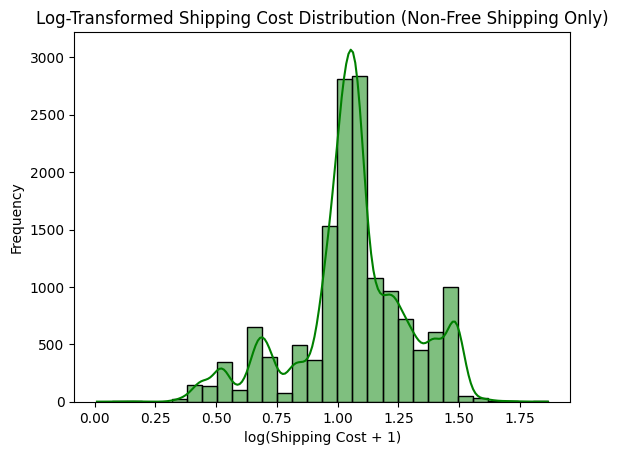

In [55]:
# Apply log1p transformation
X_train['Shipping Cost Log'] = X_train['Shipping Cost'].apply(lambda x: np.log1p(x) if x > 0 else 0)
X_test['Shipping Cost Log'] = X_test['Shipping Cost'].apply(lambda x: np.log1p(x) if x > 0 else 0)

# Visualize non-free shipping
non_free_shipping = X_train[X_train['Shipping Cost'] > 0]
sns.histplot(non_free_shipping['Shipping Cost Log'], kde=True, bins=30, color='green')
plt.title("Log-Transformed Shipping Cost Distribution (Non-Free Shipping Only)")
plt.xlabel("log(Shipping Cost + 1)")
plt.ylabel("Frequency")
plt.show()

Binning for Categorical Models (Optional): Create bins for Shipping Cost and one-hot encode them

In [56]:
# Define bins and labels
bins = [0, 1, 5, 15, 50, float('inf')]  # Shipping cost ranges
labels = ['Free', 'Low', 'Medium', 'High', 'Very High']

# Categorize shipping cost
X_train['Shipping Cost Bin'] = pd.cut(X_train['Shipping Cost'], bins=bins, labels=labels, include_lowest=True)
X_test['Shipping Cost Bin'] = pd.cut(X_test['Shipping Cost'], bins=bins, labels=labels, include_lowest=True)

# One-hot encode Shipping Cost Bin
X_train = pd.get_dummies(X_train, columns=['Shipping Cost Bin'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Shipping Cost Bin'], drop_first=True)

#### 4: Validation

In [57]:
print("Missing values in Shipping Cost (Training Set):", X_train['Shipping Cost'].isnull().sum())
print("Missing values in Shipping Cost (Test Set):", X_test['Shipping Cost'].isnull().sum())

Missing values in Shipping Cost (Training Set): 0
Missing values in Shipping Cost (Test Set): 0


In [58]:
print(X_train['Shipping Cost'].describe())
print(X_train['Shipping Cost Log'].describe())
print(X_train['Free Shipping'].value_counts())

count    67892.000000
mean         0.430031
std          0.872834
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.451939
Name: Shipping Cost, dtype: float64
count    67892.000000
mean         0.231822
std          0.452114
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.864381
Name: Shipping Cost Log, dtype: float64
Free Shipping
1    53071
0    14821
Name: count, dtype: int64


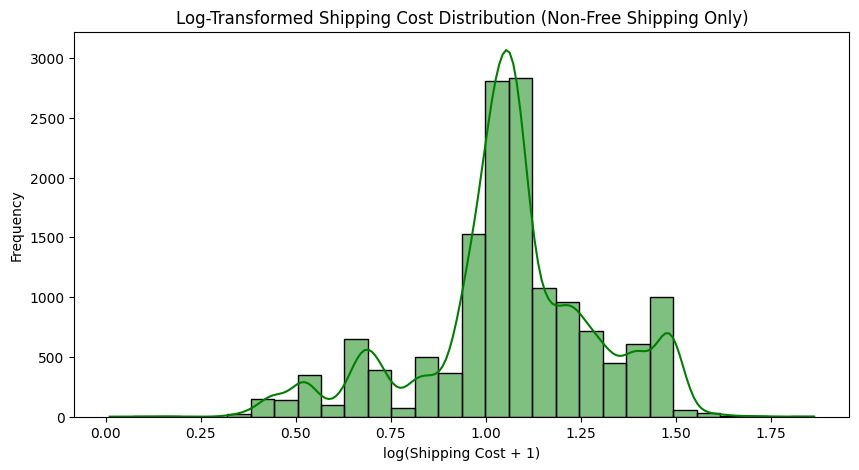

In [59]:
# Separate free and non-free shipping
non_free_shipping = X_train[X_train['Shipping Cost'] > 0]
free_shipping = X_train[X_train['Shipping Cost'] == 0]

# Visualize non-free shipping costs after log transformation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(non_free_shipping['Shipping Cost Log'], kde=True, bins=30, color='green')
plt.title("Log-Transformed Shipping Cost Distribution (Non-Free Shipping Only)")
plt.xlabel("log(Shipping Cost + 1)")
plt.ylabel("Frequency")
plt.show()

In [60]:
print(X_train.isna().sum())
print(X_test.isna().sum())

Title                             0
Price                             0
Currency                          0
Condition                      2845
Category                          0
Seller                            0
Feedback Score                    0
Positive Feedback %               0
Top Rated Seller                  0
Shipping Type                     0
Shipping Cost                     0
Listing Type                      0
Buy It Now Available              0
View Item URL                     0
Marketplace                       0
Gallery URL Missing               0
Store Info Missing                0
Image Info Missing                0
Condition Missing                 0
Start Day                         0
Start Hour                        0
Start Month                       0
End Day                           0
End Hour                          0
Start Weekend                     0
End Weekend                       0
Feedback Category                 0
Feedback Category Encoded   

#### 5. One-Hot Encode 'Shipping Type' column

In [61]:
X_train = pd.get_dummies(X_train, columns=['Shipping Type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Shipping Type'], drop_first=True)

# Align train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [62]:
# Drop original column
X_train = X_train.drop(columns=['Shipping Type'], errors='ignore')
X_test = X_test.drop(columns=['Shipping Type'], errors='ignore')

### Transform Condition column

#### 1. Explore condition column

In [63]:
# Crosstab between Condition and Listing Type
condition_listing_crosstab = pd.crosstab(X_train['Condition'], X_train['Listing Type'])

print(condition_listing_crosstab)

Listing Type              Auction  AuctionWithBIN  FixedPrice  StoreInventory
Condition                                                                    
Acceptable                     13               5         938               1
Brand New                      11               1        4237               7
Certified - Refurbished         0               0           1               0
For parts or not working        1               0          20               0
Good                           26              10        4312               5
Like New                       17               5         850               2
New                           134              62       38463              20
New other (see details)         5               0         101               0
New with box                    0               0          14               0
New with defects                0               0           6               0
New with tags                   7               8        2688   

In [64]:
from scipy.stats import chi2_contingency

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(condition_listing_crosstab)

print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
if p < 0.05:
    print("The relationship between Condition and Listing Type is statistically significant.")
else:
    print("No statistically significant relationship between Condition and Listing Type.")

Chi-squared statistic: 631.6171178393356
p-value: 8.975635104504522e-103
The relationship between Condition and Listing Type is statistically significant.


In [65]:
import numpy as np

# Calculate Cramér's V
n = condition_listing_crosstab.values.sum()  # Total number of observations
cramers_v = np.sqrt(chi2 / (n * (min(condition_listing_crosstab.shape) - 1)))

print(f"Cramér's V: {cramers_v}")
if cramers_v < 0.1:
    print("Negligible association.")
elif cramers_v < 0.3:
    print("Weak association.")
elif cramers_v < 0.5:
    print("Moderate association.")
else:
    print("Strong association.")

Cramér's V: 0.05689219405126102
Negligible association.


#### 2. Explore Listing Type Distribution for missing conditions

Listing Type Distribution for Missing Conditions:
Listing Type
FixedPrice        2376
AuctionWithBIN     296
Auction            170
StoreInventory       3
Name: count, dtype: int64


C:\Users\xnoor\AppData\Local\Temp\ipykernel_15076\3919998014.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_condition_listing_dist.index, y=missing_condition_listing_dist.values, palette="viridis")


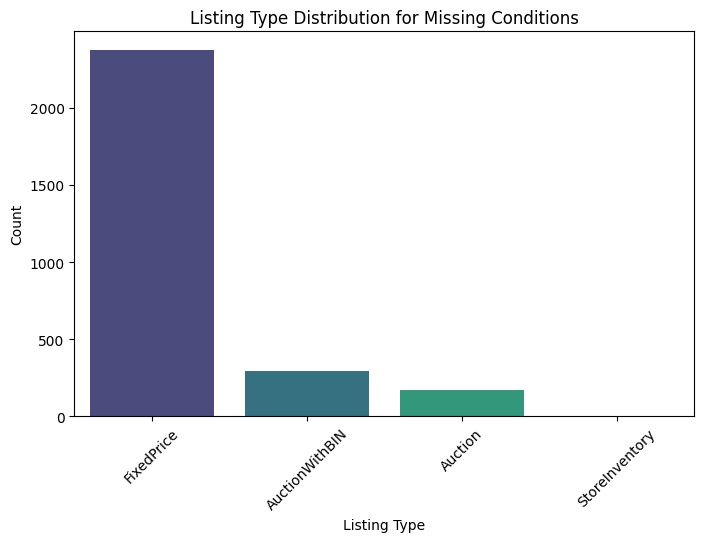

In [66]:
# Filter rows where 'Condition' is missing
missing_condition_rows = X_train[X_train['Condition'].isnull()]

# Check the distribution of 'Listing Type' in these rows
missing_condition_listing_dist = missing_condition_rows['Listing Type'].value_counts()

# Print the distribution
print("Listing Type Distribution for Missing Conditions:")
print(missing_condition_listing_dist)

# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=missing_condition_listing_dist.index, y=missing_condition_listing_dist.values, palette="viridis")
plt.title("Listing Type Distribution for Missing Conditions")
plt.xlabel("Listing Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### 3. Impute by Mode of Condition for Each Listing Type

In [67]:
# Compute the mode of 'Condition' for each 'Listing Type'
condition_modes = X_train.groupby('Listing Type')['Condition'].agg(pd.Series.mode)

# Fallback to the overall mode
overall_mode = X_train['Condition'].mode()[0]

# Define a function to impute missing values
def impute_condition(row):
    if pd.notnull(row['Condition']):
        return row['Condition']
    elif row['Listing Type'] in condition_modes:
        return condition_modes[row['Listing Type']]
    else:
        return overall_mode  # Fallback to overall mode

# Apply the function to both training and test sets
X_train['Condition'] = X_train.apply(impute_condition, axis=1)
X_test['Condition'] = X_test.apply(impute_condition, axis=1)

# Verify if all missing values are imputed
print("Missing values in Condition (Training Set):", X_train['Condition'].isnull().sum())
print("Missing values in Condition (Test Set):", X_test['Condition'].isnull().sum())

Missing values in Condition (Training Set): 0
Missing values in Condition (Test Set): 0


#### 4. Validation

In [68]:
print(X_train.shape)
print(X_test.shape)

(67892, 40)
(29097, 40)


In [69]:
print(y_train.shape)
print(y_test.shape)

(67892,)
(29097,)


In [70]:
print(X_train.isna().sum())
print(X_test.isna().sum())

Title                                                0
Price                                                0
Currency                                             0
Condition                                            0
Category                                             0
Seller                                               0
Feedback Score                                       0
Positive Feedback %                                  0
Top Rated Seller                                     0
Shipping Cost                                        0
Listing Type                                         0
Buy It Now Available                                 0
View Item URL                                        0
Marketplace                                          0
Gallery URL Missing                                  0
Store Info Missing                                   0
Image Info Missing                                   0
Condition Missing                                    0
Start Day 

#### 5. One-Hot Encode 'Condition' column

In [71]:
# One-Hot Encoding for the 'Condition' column
X_train = pd.get_dummies(X_train, columns=['Condition'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Condition'], drop_first=True)

# Align train and test sets to ensure they have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Drop the original 'Condition' column 
X_train = X_train.drop(columns=['Condition'], errors='ignore')
X_test = X_test.drop(columns=['Condition'], errors='ignore')

### Transform Category column

In [72]:
# Frequency Encoding for 'Category' and 'Seller'
category_frequency = X_train['Category'].value_counts()
X_train['Category_Frequency'] = X_train['Category'].map(category_frequency)
X_test['Category_Frequency'] = X_test['Category'].map(category_frequency)

seller_frequency = X_train['Seller'].value_counts()
X_train['Seller_Frequency'] = X_train['Seller'].map(seller_frequency)
X_test['Seller_Frequency'] = X_test['Seller'].map(seller_frequency)

In [73]:
# For X_train
nan_columns_train = X_train.columns[X_train.isna().any()]
print(f"Columns with NaN values in X_train: {nan_columns_train}")

# For X_test
nan_columns_test = X_test.columns[X_test.isna().any()]
print(f"Columns with NaN values in X_test: {nan_columns_test}")

Columns with NaN values in X_train: Index([], dtype='object')
Columns with NaN values in X_test: Index(['Category_Frequency', 'Seller_Frequency'], dtype='object')


In [74]:
# Frequency Encoding for 'Category' and 'Seller'
category_frequency = X_train['Category'].value_counts()
X_train['Category_Frequency'] = X_train['Category'].map(category_frequency)
X_test['Category_Frequency'] = X_test['Category'].map(category_frequency).fillna(0)  # Fill NaNs with 0

seller_frequency = X_train['Seller'].value_counts()
X_train['Seller_Frequency'] = X_train['Seller'].map(seller_frequency)
X_test['Seller_Frequency'] = X_test['Seller'].map(seller_frequency).fillna(0)  # Fill NaNs with 0

In [75]:
# Drop the original 'Category' and 'Seller' columns
X_train = X_train.drop(columns=['Category', 'Seller'], errors='ignore')
X_test = X_test.drop(columns=['Category', 'Seller'], errors='ignore')

In [76]:
X_train.columns.tolist()

['Title',
 'Price',
 'Currency',
 'Feedback Score',
 'Positive Feedback %',
 'Top Rated Seller',
 'Shipping Cost',
 'Listing Type',
 'Buy It Now Available',
 'View Item URL',
 'Marketplace',
 'Gallery URL Missing',
 'Store Info Missing',
 'Image Info Missing',
 'Condition Missing',
 'Start Day',
 'Start Hour',
 'Start Month',
 'End Day',
 'End Hour',
 'Start Weekend',
 'End Weekend',
 'Feedback Category',
 'Feedback Category Encoded',
 'Free Shipping',
 'Shipping Cost Log',
 'Shipping Cost Bin_Low',
 'Shipping Cost Bin_Medium',
 'Shipping Cost Bin_High',
 'Shipping Cost Bin_Very High',
 'Shipping Type_CalculatedDomesticFlatInternational',
 'Shipping Type_Flat',
 'Shipping Type_FlatDomesticCalculatedInternational',
 'Shipping Type_Free',
 'Shipping Type_FreePickup',
 'Shipping Type_Freight',
 'Shipping Type_NotSpecified',
 'Condition_Brand New',
 'Condition_Certified - Refurbished',
 'Condition_For parts or not working',
 'Condition_Good',
 'Condition_Like New',
 'Condition_New',
 'Cond

### Transform Temporal columns

One-Hot Encoding for Start Day and End Day

In [77]:
# One-Hot Encode Start Day and End Day
X_train = pd.get_dummies(X_train, columns=['Start Day', 'End Day'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Start Day', 'End Day'], drop_first=True)

# Align train and test sets to ensure consistent columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [78]:
# Drop original columns
X_train = X_train.drop(columns=['Start Day', 'End Day'], errors='ignore')
X_test = X_test.drop(columns=['Start Day', 'End Day'], errors='ignore')

Cyclic Encoding for Start Hour, End Hour, and Start Month

In [79]:
import numpy as np

# Cyclic Encoding for Start Hour and End Hour
X_train['Start Hour Sin'] = np.sin(2 * np.pi * X_train['Start Hour'] / 24)
X_train['Start Hour Cos'] = np.cos(2 * np.pi * X_train['Start Hour'] / 24)
X_test['Start Hour Sin'] = np.sin(2 * np.pi * X_test['Start Hour'] / 24)
X_test['Start Hour Cos'] = np.cos(2 * np.pi * X_test['Start Hour'] / 24)

X_train['End Hour Sin'] = np.sin(2 * np.pi * X_train['End Hour'] / 24)
X_train['End Hour Cos'] = np.cos(2 * np.pi * X_train['End Hour'] / 24)
X_test['End Hour Sin'] = np.sin(2 * np.pi * X_test['End Hour'] / 24)
X_test['End Hour Cos'] = np.cos(2 * np.pi * X_test['End Hour'] / 24)

# Cyclic Encoding for Start Month
X_train['Start Month Sin'] = np.sin(2 * np.pi * X_train['Start Month'] / 12)
X_train['Start Month Cos'] = np.cos(2 * np.pi * X_train['Start Month'] / 12)
X_test['Start Month Sin'] = np.sin(2 * np.pi * X_test['Start Month'] / 12)
X_test['Start Month Cos'] = np.cos(2 * np.pi * X_test['Start Month'] / 12)


### Transform Feedback Category column

In [80]:
print(X_train['Feedback Category'].unique())
print(X_train['Feedback Category Encoded'].unique())

# Correlation with target for ordinal encoding
print("Correlation with Target (Ordinal Encoding):")
print(X_train["Feedback Category Encoded"].corr(y_train))

# One-hot encode Feedback Category
X_train_onehot = pd.get_dummies(X_train, columns=["Feedback Category"], drop_first=True)

# Identify one-hot encoded columns for Feedback Category
onehot_features = [col for col in X_train_onehot.columns if "Feedback Category_" in col]

# Correlation of one-hot encoded features with the target
correlations_onehot = X_train_onehot[onehot_features].corrwith(y_train)
print("Correlation with Target (One-Hot Encoding):")
print(correlations_onehot)

['Perfect', 'High', 'Low', 'Medium']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Perfect']
[1.38629436 1.09861229 0.         0.69314718]
Correlation with Target (Ordinal Encoding):
0.0815931671330195
Correlation with Target (One-Hot Encoding):
Feedback Category_Medium    -0.028510
Feedback Category_High      -0.060419
Feedback Category_Perfect    0.084837
dtype: float64


In [81]:
# One-hot encode Feedback Category
X_train = pd.get_dummies(X_train, columns=['Feedback Category'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Feedback Category'], drop_first=True)

# Align train and test sets to ensure they have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Pre-Modeling Checklist

## 1. Ensure all features are numeric

In [82]:
# Identify and print columns with 'object' dtype
non_numeric_object_columns = X_train.dtypes[X_train.dtypes == 'object'].index
non_numeric_object_columns.tolist()

['Title', 'Currency', 'Listing Type', 'View Item URL', 'Marketplace']

In [83]:
# Drop irrelevant columns
columns_to_drop = ['Title', 'View Item URL']
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# Apply One-Hot Encoding for remaining non-numeric columns
columns_to_encode = ['Currency', 'Listing Type', 'Marketplace']
X_train = pd.get_dummies(X_train, columns=columns_to_encode, drop_first=True)
X_test = pd.get_dummies(X_test, columns=columns_to_encode, drop_first=True)

# Align train and test sets to ensure consistent columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [84]:
# Verify the dataypes
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 67892 entries, 56169 to 15795
Data columns (total 75 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Price                                              67892 non-null  float64
 1   Feedback Score                                     67892 non-null  float64
 2   Positive Feedback %                                67892 non-null  float64
 3   Top Rated Seller                                   67892 non-null  bool   
 4   Shipping Cost                                      67892 non-null  float64
 5   Buy It Now Available                               67892 non-null  bool   
 6   Gallery URL Missing                                67892 non-null  int32  
 7   Store Info Missing                                 67892 non-null  int32  
 8   Image Info Missing                                 67892 non-null  int32  
 9   Conditi

## 2. Check if any Missing Values

In [85]:
# For X_train
nan_columns_train = X_train.columns[X_train.isna().any()]
print(f"Columns with NaN values in X_train: {nan_columns_train}")

# For X_test
nan_columns_test = X_test.columns[X_test.isna().any()]
print(f"Columns with NaN values in X_test: {nan_columns_test}")

Columns with NaN values in X_train: Index([], dtype='object')
Columns with NaN values in X_test: Index([], dtype='object')


## 3. Check for Distribution

In [86]:
# Compute percentage differences between train and test statistics
numeric_differences = pd.DataFrame({
    "Mean Difference (%)": ((X_test[numeric_cols].mean() - X_train[numeric_cols].mean()).abs() / X_train[numeric_cols].mean()) * 100,
    "Std Difference (%)": ((X_test[numeric_cols].std() - X_train[numeric_cols].std()).abs() / X_train[numeric_cols].std()) * 100,
})

# Print the differences
print("Numeric Feature Distribution Differences:")
print(numeric_differences)

Numeric Feature Distribution Differences:
                           Mean Difference (%)  Std Difference (%)
Price                                 0.231671            0.311983
Feedback Score                        0.015531            0.315431
Positive Feedback %                   0.154731            3.100653
Shipping Cost                         1.391362            0.730478
Feedback Category Encoded             0.285529            1.834693


**Next Steps**

1. Proceed with tree-based modeling directly.
2. After baseline evaluation, if performance is suboptimal:
    * Apply stratification during splitting.
    * Investigate specific features causing issue

## 4. Check for Multicollinearity

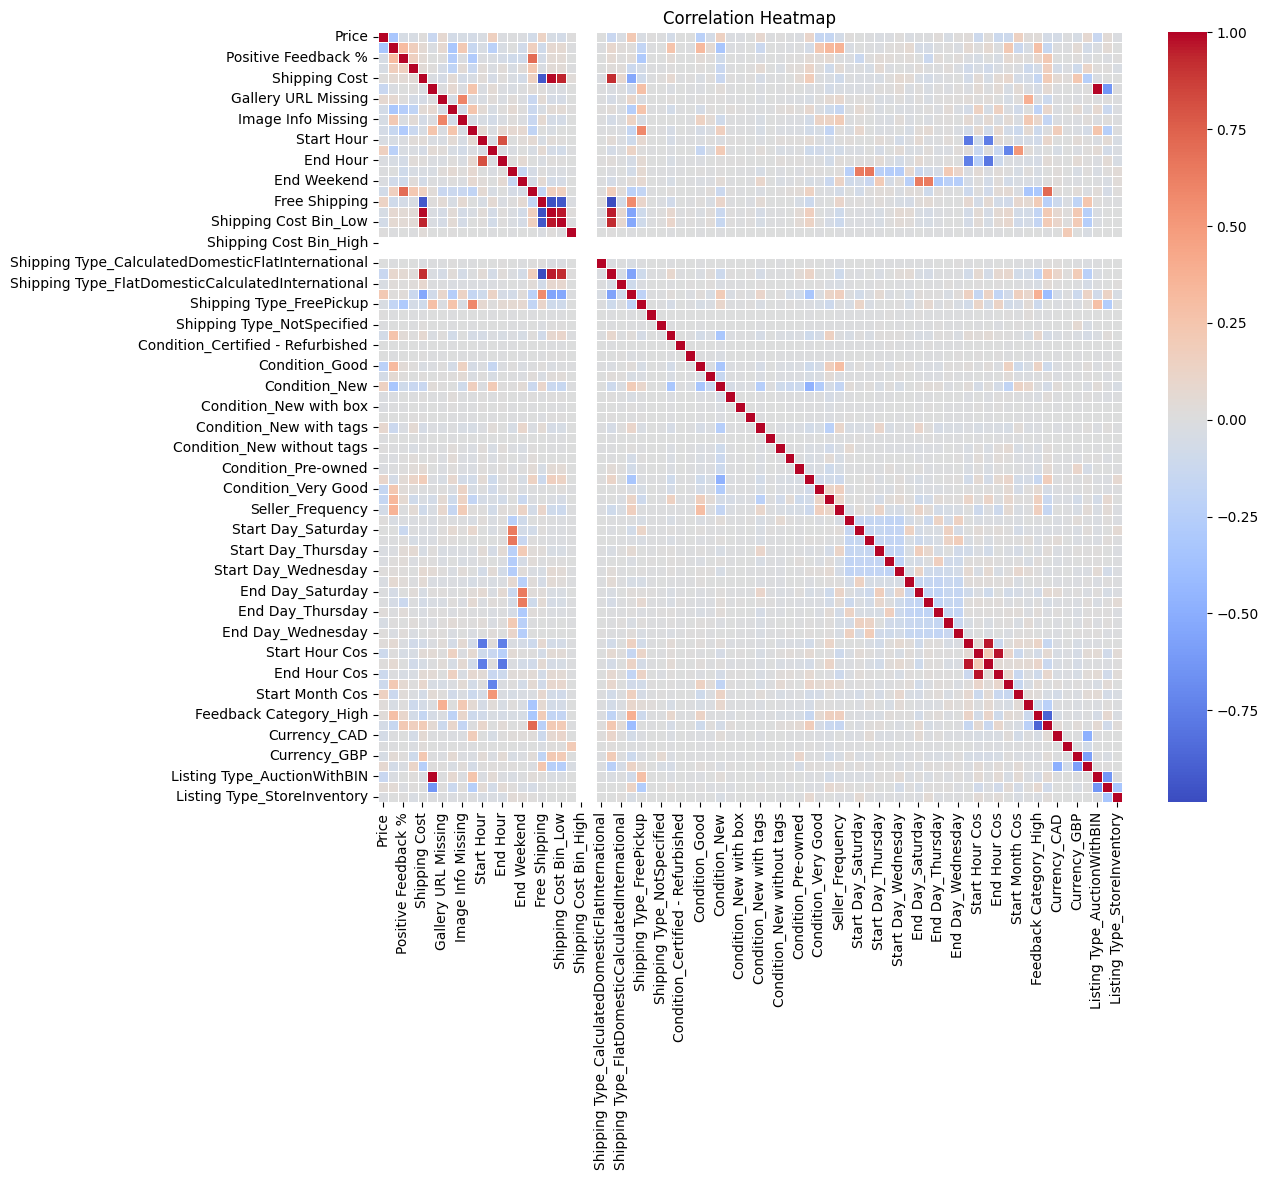

Highly Correlated Pairs:
Shipping Cost          Shipping Cost Log        0.990771
Shipping Cost Log      Shipping Cost            0.990771
End Hour Cos           Start Hour Cos           0.969087
Start Hour Cos         End Hour Cos             0.969087
Shipping Cost Log      Shipping Cost Bin_Low    0.966736
Shipping Cost Bin_Low  Shipping Cost Log        0.966736
Start Hour Sin         End Hour Sin             0.964831
End Hour Sin           Start Hour Sin           0.964831
Shipping Cost Log      Shipping Type_Flat       0.956060
Shipping Type_Flat     Shipping Cost Log        0.956060
Shipping Cost Bin_Low  Shipping Cost            0.945531
Shipping Cost          Shipping Cost Bin_Low    0.945531
Shipping Cost Bin_Low  Shipping Type_Flat       0.924232
Shipping Type_Flat     Shipping Cost Bin_Low    0.924232
Shipping Cost          Shipping Type_Flat       0.918088
Shipping Type_Flat     Shipping Cost            0.918088
Start Hour             End Hour                 0.806325
End Ho

In [87]:
# Compute correlation matrix for numeric features
corr_matrix = X_train.corr()

# Plot heatmap of correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Display pairs with high correlation
high_corr = corr_matrix.unstack().sort_values(ascending=False)
high_corr = high_corr[(high_corr > 0.8) & (high_corr < 1)]  # Exclude self-correlation
print("Highly Correlated Pairs:")
print(high_corr)

In [88]:
!pip install statsmodels

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Compute VIF for numeric features
X_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_numeric = add_constant(X_numeric)  # Add constant term for VIF calculation

vif_data = pd.DataFrame({
    "Feature": X_numeric.columns,
    "VIF": [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
})

# Exclude the constant column
vif_data = vif_data[vif_data['Feature'] != 'const']

# Display VIF values
print(vif_data)

                      Feature        VIF
1                       Price   1.417037
2              Feedback Score   1.701116
3         Positive Feedback %   2.286893
4               Shipping Cost  68.154875
5   Feedback Category Encoded   2.140860
6           Shipping Cost Log  68.493260
7          Category_Frequency   1.155230
8            Seller_Frequency   1.232871
9              Start Hour Sin  25.399103
10             Start Hour Cos  32.625575
11               End Hour Sin  25.732125
12               End Hour Cos  32.170701
13            Start Month Sin   1.085834
14            Start Month Cos   1.077697


**Findings**

From the heatmap and correlation pairs, remove one feature from each highly correlated pairs. 


## 5. Select Relevant Features

Based on the high correlations identified earlier, we'll drop the following:

1. Drop Shipping Cost: Retain Shipping Cost Log.
2. Drop Start Hour Cos: Retain End Hour Cos.
3. Drop Shipping Cost Bin_Low: Covered by Shipping Cost Log.
4. Drop Shipping Type_Flat: Correlated with Shipping Cost Log.
5. Drop Start Hour Sin: Retain End Hour Sin.

In [90]:
# Specify the features to drop
features_to_drop = [
    "Shipping Cost", "Start Hour Cos", "Shipping Cost Bin_Low", 
    "Shipping Type_Flat", "Start Hour Sin"
]
X_train_reduced = X_train.drop(columns=features_to_drop, errors='ignore')
X_test_reduced = X_test.drop(columns=features_to_drop, errors='ignore')

In [91]:
print(X_train_reduced.columns)

Index(['Price', 'Feedback Score', 'Positive Feedback %', 'Top Rated Seller',
       'Buy It Now Available', 'Gallery URL Missing', 'Store Info Missing',
       'Image Info Missing', 'Condition Missing', 'Start Hour', 'Start Month',
       'End Hour', 'Start Weekend', 'End Weekend', 'Feedback Category Encoded',
       'Free Shipping', 'Shipping Cost Log', 'Shipping Cost Bin_Medium',
       'Shipping Cost Bin_High', 'Shipping Cost Bin_Very High',
       'Shipping Type_CalculatedDomesticFlatInternational',
       'Shipping Type_FlatDomesticCalculatedInternational',
       'Shipping Type_Free', 'Shipping Type_FreePickup',
       'Shipping Type_Freight', 'Shipping Type_NotSpecified',
       'Condition_Brand New', 'Condition_Certified - Refurbished',
       'Condition_For parts or not working', 'Condition_Good',
       'Condition_Like New', 'Condition_New',
       'Condition_New other (see details)', 'Condition_New with box',
       'Condition_New with defects', 'Condition_New with tags',
  

## 6. Standardize the data

### Standardize Features

In [92]:
# Standardize the Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

In [93]:
# Print shapes and check for missing values before standardization
print("Before Standardization:")
print(f"X_train_scaled shape: {X_train.shape}")
print(f"X_test_scaled shape: {X_test.shape}")
print(f"Missing values in X_train: {pd.DataFrame(X_train).isna().sum().sum()}")
print(f"Missing values in X_test: {pd.DataFrame(X_test).isna().sum().sum()}")

# Print shapes and check for missing values after standardization
print("After Standardization:")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"Missing values in X_train_scaled: {pd.DataFrame(X_train_scaled).isna().sum().sum()}")
print(f"Missing values in X_test_scaled: {pd.DataFrame(X_test_scaled).isna().sum().sum()}")

Before Standardization:
X_train_scaled shape: (67892, 75)
X_test_scaled shape: (29097, 75)
Missing values in X_train: 0
Missing values in X_test: 0
After Standardization:
X_train_scaled shape: (67892, 70)
X_test_scaled shape: (29097, 70)
Missing values in X_train_scaled: 0
Missing values in X_test_scaled: 0


In [94]:
import pandas as pd

# Convert the scaled numpy array to a DataFrame with feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_reduced.columns)

# Print the first few rows to check the scaled values
print(X_train_scaled_df.head())

      Price  Feedback Score  Positive Feedback %  Top Rated Seller  \
0  0.270014       -0.893811             0.172069         -0.964456   
1 -0.331523        1.754178             0.162097         -0.964456   
2  0.115671        1.201415             0.164953         -0.964456   
3  0.153252        0.021437             0.166379         -0.964456   
4  0.504143       -0.158875             0.160667         -0.964456   

   Buy It Now Available  Gallery URL Missing  Store Info Missing  \
0             -0.081135            -0.105047           -0.438306   
1             -0.081135            -0.105047           -0.438306   
2             -0.081135            -0.105047           -0.438306   
3             -0.081135            -0.105047           -0.438306   
4             -0.081135            -0.105047           -0.438306   

   Image Info Missing  Condition Missing  Start Hour  ...  \
0           -0.175696          -0.209135    0.090544  ...   
1           -0.175696          -0.209135   -1.49

### Standardize Target

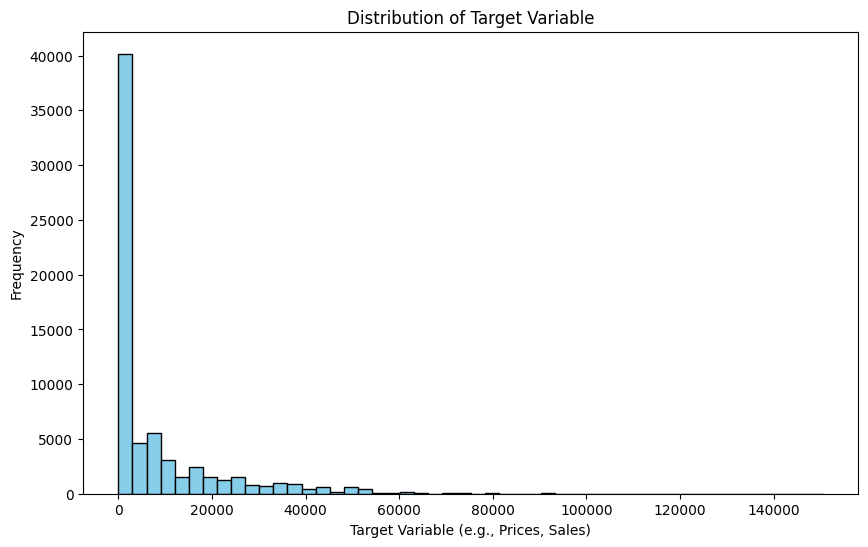

In [95]:
import matplotlib.pyplot as plt

# Plot histogram of the target variable (y_train)
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable (e.g., Prices, Sales)')
plt.ylabel('Frequency')
plt.show()

In [96]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Apply log transformation to the target variable (if values are strictly positive)
y_train_log = np.log1p(y_train)  # log(1 + y_train) to avoid log(0) issues
y_test_log = np.log1p(y_test)

# Standardize the log-transformed target variable
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train_log.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test_log.values.reshape(-1, 1))

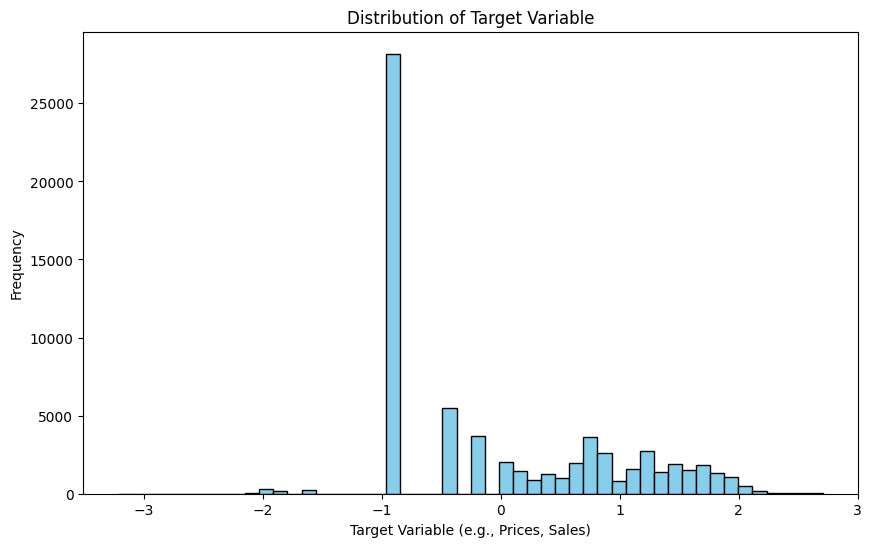

In [97]:
import matplotlib.pyplot as plt

# Plot histogram of the target variable (y_train_scaled)
plt.figure(figsize=(10, 6))
plt.hist(y_train_scaled, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable (e.g., Prices, Sales)')
plt.ylabel('Frequency')
plt.show()

## 7. Perform PCA to retain 95% of the variance

### Explained Variance Ratio

In [98]:
from sklearn.decomposition import PCA

# Retain components explaining 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [99]:
# Create column names for the PCA components
pca_columns = [f'PC{i+1}' for i in range(X_train_scaled.shape[1])]

# Convert the scaled data to a DataFrame with meaningful column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=pca_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=pca_columns)

# Print the first few rows of the scaled PCA DataFrame
print(X_train_scaled_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.270014 -0.893811  0.172069 -0.964456 -0.081135 -0.105047 -0.438306   
1 -0.331523  1.754178  0.162097 -0.964456 -0.081135 -0.105047 -0.438306   
2  0.115671  1.201415  0.164953 -0.964456 -0.081135 -0.105047 -0.438306   
3  0.153252  0.021437  0.166379 -0.964456 -0.081135 -0.105047 -0.438306   
4  0.504143 -0.158875  0.160667 -0.964456 -0.081135 -0.105047 -0.438306   

        PC8       PC9      PC10  ...      PC61     PC62     PC63      PC64  \
0 -0.175696 -0.209135  0.090544  ... -0.171236 -0.67757  0.77607 -0.085088   
1 -0.175696 -0.209135 -1.495985  ... -0.171236 -0.67757  0.77607 -0.085088   
2 -0.175696 -0.209135  0.090544  ... -0.171236 -0.67757  0.77607 -0.085088   
3 -0.175696 -0.209135 -0.197916  ... -0.171236 -0.67757  0.77607 -0.085088   
4 -0.175696 -0.209135 -0.919065  ... -0.171236 -0.67757  0.77607 -0.085088   

       PC65      PC66      PC67      PC68      PC69      PC70  
0 -0.013296 -0.1

Goal: To see how much variance each principal component explains and confirm that you've retained 95% of the variance.

Visualization: Plot the explained variance ratio for each principal component.

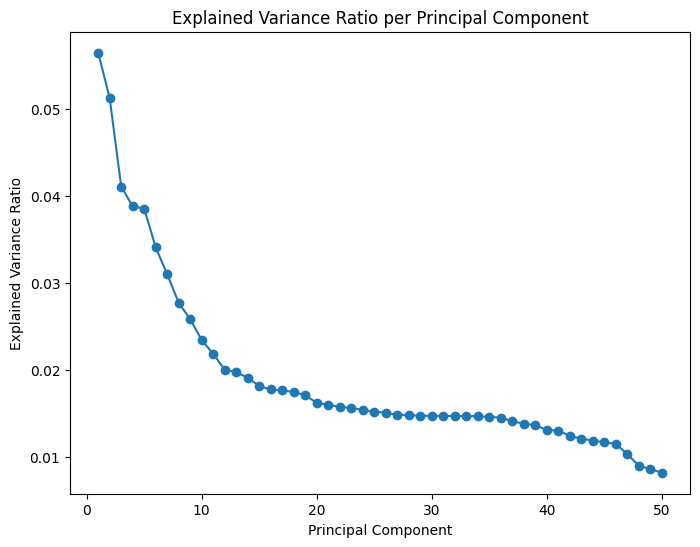

In [100]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

**Findings**

Explained Variance Ratio per Principal Component:

* The first components explain the bulk of the variance, which means that dimensionality reduction using these components would retain most of the important information in the data.

* It would be appropriate to retain the first 10-20 components if you want to keep a high percentage of the variance in the data (such as around 90-95%).

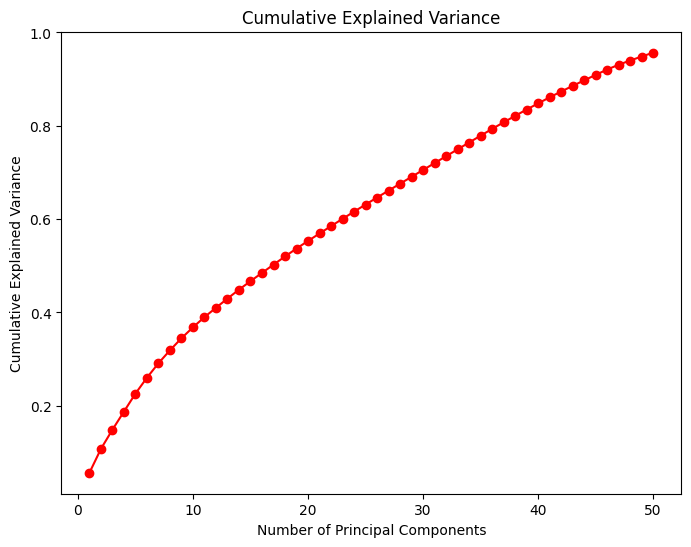

In [ ]:
# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', color='r')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

**Findings**

Cumulative Explained Variance:

* The plot suggests that we can use a smaller number of components (around 30-35) to explain most of the variance in the dataset, which will help reduce dimensionality while preserving key information.

* We can decide whether to retain 95% variance or adjust based on computational efficiency and model complexity.

###  PCA Scatter Plot

Goal: To visualize the distribution of data points along the first two principal components. This can reveal clusters or patterns in the data.

Visualization: Plot the first two principal components of the transformed dataset.

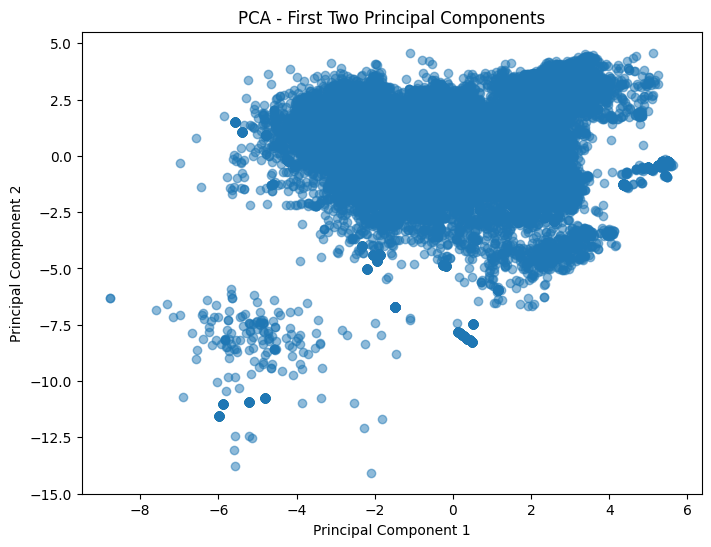

In [ ]:
# PCA Scatter Plot (first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Findings**

* The scatter plot shows that the dimensionality reduction has successfully captured major patterns in the data with the first two principal components. 


!!BOOKMARK!!

* However, we can further investigate the smaller cluster in the bottom-left corner for any possible outliers or special cases.

* Will do this after running this existing PCA first. And will come back later for further investigation.


### Heatmap of the First Few Principal Components:

Goal: To check if the transformed data is concentrated around certain principal components.

Visualization: Use a heatmap to show the relationship between the principal components

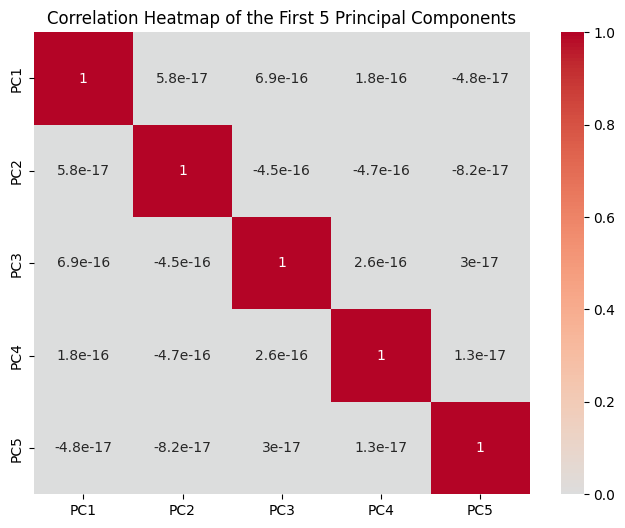

In [ ]:
import seaborn as sns
# Create a DataFrame for the first few components (say top 5)
pca_df = pd.DataFrame(X_train_pca[:, :5], columns=[f'PC{i+1}' for i in range(5)])

# Heatmap for the first 5 principal components
plt.figure(figsize=(8, 6))
sns.heatmap(pca_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of the First 5 Principal Components')
plt.show()

**Findings**

* Perfect Orthogonality: The correlation values between the first five principal components (PC1, PC2, PC3, PC4, and PC5) are extremely close to zero, indicating that these components are almost perfectly orthogonal.

* No Redundancy: The lack of significant correlation suggests that each principal component captures a unique direction of variance in the data without redundancy.


# Step 5. Modeling

## Model selection

Selected models

1. Random Forest Regressor: A robust ensemble method that can handle non-linearity and large datasets.
2. Gradient Boosting Regressor: A boosting algorithm that can provide high accuracy, especially when tuning is done.
3. XGBoost Regressor: Known for its speed and performance, especially in large datasets with many features.
4. DecisionTreeRegressor: Simple but often overfits; good as a baseline.
5. ExtraTreesRegressor: Faster and potentially more robust than Random Forest.
6. LightGBM: Efficient and scalable for large datasets; often performs better than XGBoost in speed.
7. CatBoost: Great for datasets with many categorical features and fast training.

# Step 6. Evaluation

## Analyze Models Performance 

### Before Standardizing Target

XGBoost Regressor Performance:
R-squared: 0.5551178135226686
RMSE: 8765.049938356746

Gradient Boosting Regressor Performance:
R-squared: 0.3889005429164508
RMSE: 10272.77640567705

Random Forest Regressor Performance:
R-squared: 0.6072435725972889
RMSE: 8235.567612422337

Decision Tree Regressor Performance:
R-squared: 0.2172454238344227
RMSE: 11626.384838215812

Extra Trees Regressor Performance:
R-squared: 0.6351430618823506
RMSE: 7937.672769450328

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 67892, number of used features: 50
[LightGBM] [Info] Start training from score 8281.464457
LightGBM Regressor Performance:
R-squared: 0.5177834858249524
RMSE: 9125.421346671767

### After Standardizing Target

### 1. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor with verbosity set to 1
rf_model = RandomForestRegressor(n_estimators=10, random_state=42, verbose=1, n_jobs=-1)

# Fit the model
rf_model.fit(X_train_pca, y_train_scaled)

c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.4s finished


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42, verbose=1)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Predict on the test set
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model performance
r2 = r2_score(y_test_scaled, y_pred) 
rmse = mean_squared_error(y_test_scaled, y_pred, squared=False) 

# Display the results
print("Random Forest Regressor Performance:")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

# Perform Cross-Validation (using R-squared)
cv_results_rf = cross_val_score(rf_model, X_train_pca, y_train_scaled, cv=5, scoring='r2')  # 5-fold cross-validation 

# Print cross-validation results
print("\nCross-Validation Results (R-squared) for Random Forest:")
print(f"Mean R-squared: {cv_results_rf.mean():.4f}")
print(f"Standard Deviation of R-squared: {cv_results_rf.std():.4f}")

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Random Forest Regressor Performance:
R-squared: 0.7543966240138397
RMSE: 0.4973994097252277


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.9s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.5s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
c:\Users\x


Cross-Validation Results (R-squared) for Random Forest:
Mean R-squared: 0.7363
Standard Deviation of R-squared: 0.0060


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.4s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=10, random_state=42)

# Fit the model on the scaled training data
gb_model.fit(X_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [ ]:
# Evaluate performance
r2_gb = r2_score(y_test_scaled, y_pred_gb)
rmse_gb = mean_squared_error(y_test_scaled, y_pred_gb, squared=False)

print("Gradient Boosting Regressor Performance:")
print(f"R-squared: {r2_gb}")
print(f"RMSE: {rmse_gb}")

# Perform Cross-Validation (using R-squared)
cv_results_gb = cross_val_score(gb_model, X_train_scaled, y_train_scaled, cv=5, scoring='r2')  # 5-fold cross-validation

# Print cross-validation results
print("\nCross-Validation Results (R-squared):")
print(f"Mean R-squared: {cv_results_gb.mean():.4f}")
print(f"Standard Deviation of R-squared: {cv_results_gb.std():.4f}")

c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting Regressor Performance:
R-squared: 0.41715358038275185
RMSE: 0.7662406108909322


c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\xnoor\AppData\Local


Cross-Validation Results (R-squared):
Mean R-squared: 0.4155
Standard Deviation of R-squared: 0.0036


XGBoost Regressor

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)

# Fit the model on the scaled training data
xgb_model.fit(X_train_scaled, y_train_scaled)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate performance
r2_xgb = r2_score(y_test_scaled, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test_scaled, y_pred_xgb, squared=False)

print("XGBoost Regressor Performance:")
print(f"R-squared: {r2_xgb}")
print(f"RMSE: {rmse_xgb}")

# Perform Cross-Validation (using R-squared)
cv_results_xgb = cross_val_score(xgb_model, X_train_scaled, y_train_scaled, cv=5, scoring='r2')  # 5-fold cross-validation

# Print cross-validation results
print("\nCross-Validation Results (R-squared):")
print(f"Mean R-squared: {cv_results_xgb.mean():.4f}")
print(f"Standard Deviation of R-squared: {cv_results_xgb.std():.4f}")

c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost Regressor Performance:
R-squared: 0.845564969069691
RMSE: 0.39442188939501877

Cross-Validation Results (R-squared):
Mean R-squared: 0.8357
Standard Deviation of R-squared: 0.0054


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the scaled training data
dt_model.fit(X_train_scaled, y_train_scaled)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate performance
r2_dt = r2_score(y_test_scaled, y_pred_dt)
rmse_dt = mean_squared_error(y_test_scaled, y_pred_dt, squared=False)

print("Decision Tree Regressor Performance:")
print(f"R-squared: {r2_dt}")
print(f"RMSE: {rmse_dt}")

# Perform Cross-Validation (using R-squared)
cv_results_dt = cross_val_score(dt_model, X_train_scaled, y_train_scaled, cv=5, scoring='r2')  # 5-fold cross-validation

# Print cross-validation results
print("\nCross-Validation Results (R-squared):")
print(f"Mean R-squared: {cv_results_dt.mean():.4f}")
print(f"Standard Deviation of R-squared: {cv_results_dt.std():.4f}")

c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor Performance:
R-squared: 0.6652367486070807
RMSE: 0.5807069023039381

Cross-Validation Results (R-squared):
Mean R-squared: 0.6440
Standard Deviation of R-squared: 0.0100


**Outputs after standardizing target**

Decision Tree Regressor Performance:
R-squared: 0.6652367486070807
RMSE: 0.5807069023039381

Cross-Validation Results (R-squared):
Mean R-squared: 0.6440
Standard Deviation of R-squared: 0.0100

XGBoost Regressor Performance:
R-squared: 0.845564969069691
RMSE: 0.39442188939501877

Cross-Validation Results (R-squared):
Mean R-squared: 0.8357
Standard Deviation of R-squared: 0.0054

Gradient Boosting Regressor Performance:
R-squared: 0.41715358038275185
RMSE: 0.7662406108909322

Cross-Validation Results (R-squared):
Mean R-squared: 0.4155
Standard Deviation of R-squared: 0.0036

Random Forest Regressor Performance:
R-squared: 0.7543966240138397
RMSE: 0.4973994097252277

Random Forest Regressor Performance:
R-squared: 0.7543966240138397
RMSE: 0.4973994097252277